### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### Data Collection

In [3]:
#Extracting data
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
#Our dataset dimesnions
dataset.shape

(2000, 9)

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


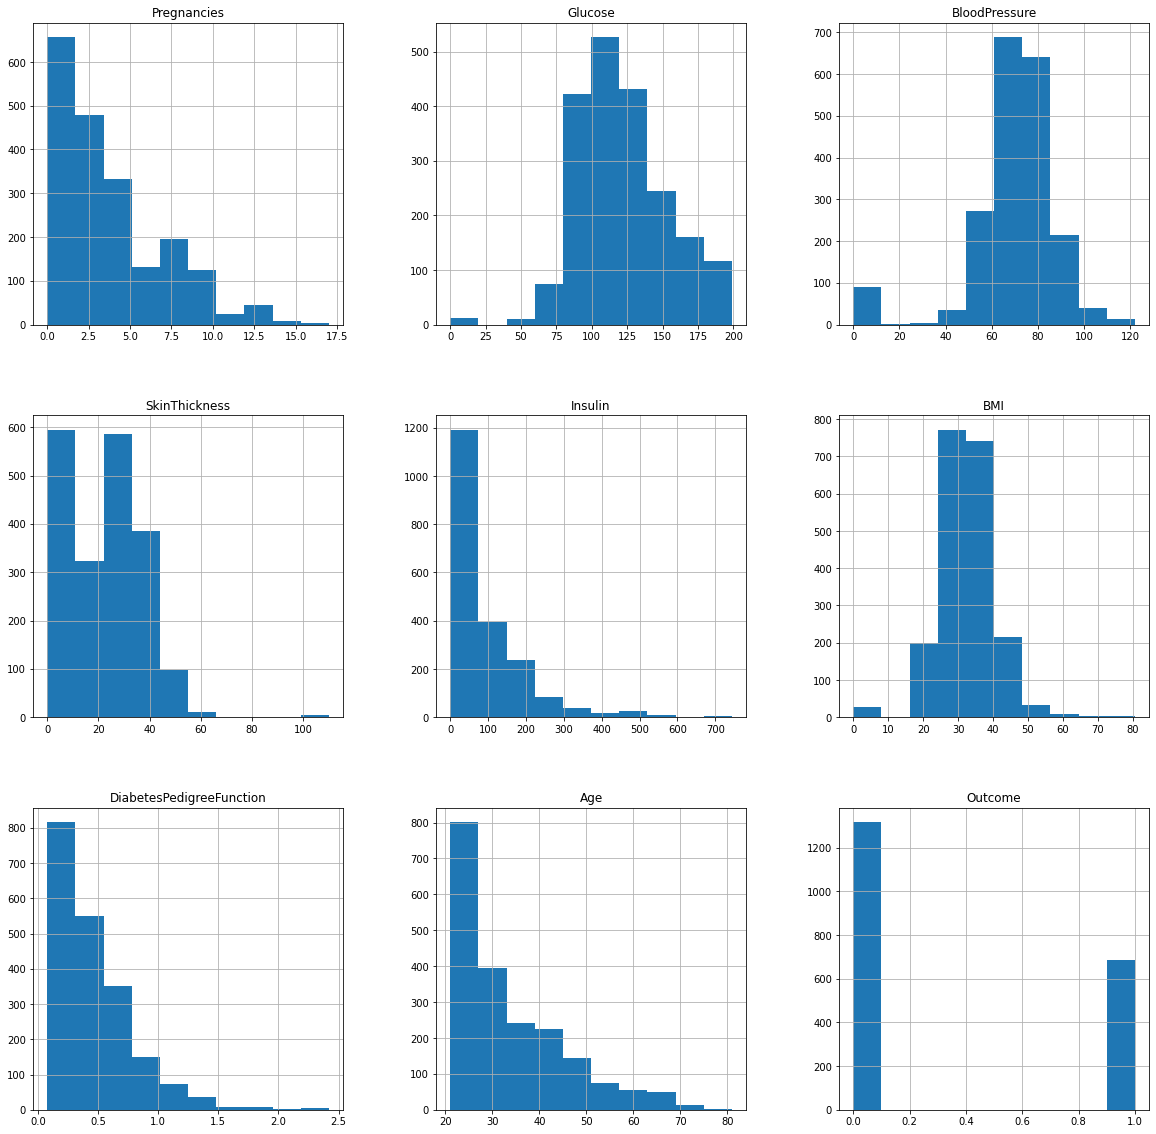

In [7]:
p = dataset.hist(figsize = (20,20))

0    1316
1     684
Name: Outcome, dtype: int64


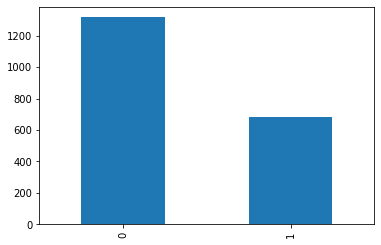

In [8]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = dataset["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(dataset.Outcome.value_counts())
p=dataset.Outcome.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Outcome', ylabel='count'>

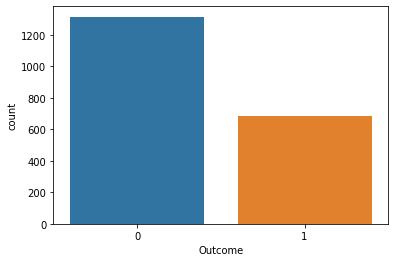

In [5]:
#Countng values of outcomes having 0 or 1, 0 means non diabetic and 1 means diabetic
sns.countplot(x='Outcome',data=dataset)

In [6]:
dataset['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [7]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


<AxesSubplot:>

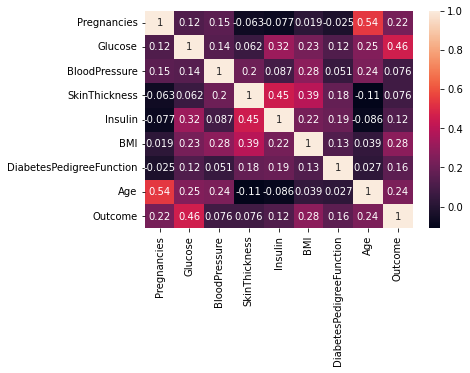

In [8]:
#Correlation matrix to show correlation between two variables, 0.x means x% similar
corr_mat=dataset.corr()
sns.heatmap(corr_mat, annot=True)



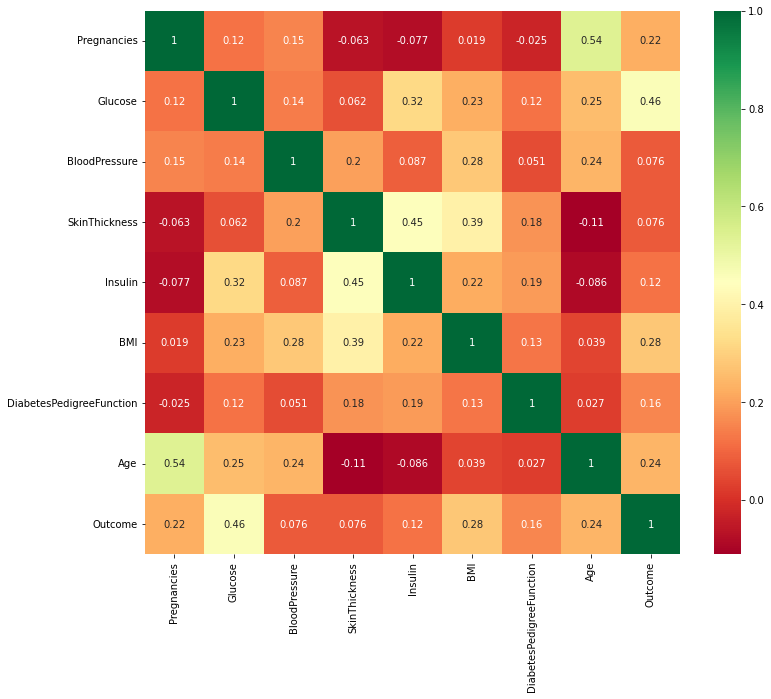

In [10]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')

In [9]:
#Ex: correlatiom between Glucose and Outcome is 47% that means output depends majorly on Glucose

 ### Data Cleaning

In [10]:
#Check if any null or empty data is present in dataset
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#Feature matrix - Taking all our independent columns into single array and dependent values into another array
x=dataset.iloc[:,:-1].values  #Independent matrix
y=dataset.iloc[:,-1].values

In [12]:
x.shape

(2000, 8)

In [13]:
x[0] #refering to column 1 in dataset i.e pregnancies

array([2.00e+00, 1.38e+02, 6.20e+01, 3.50e+01, 0.00e+00, 3.36e+01,
       1.27e-01, 4.70e+01])

In [14]:
y

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

### Exploratory Data Analysis

#### Checking which columns are useful or not

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose')

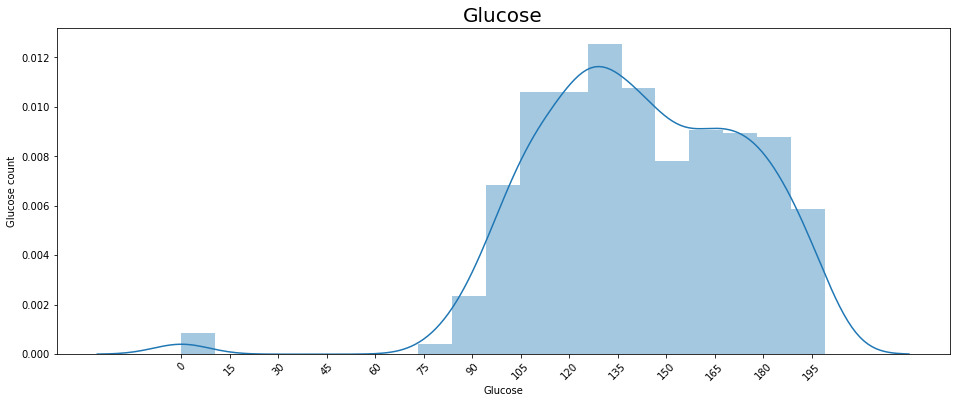

In [15]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["Glucose"][dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

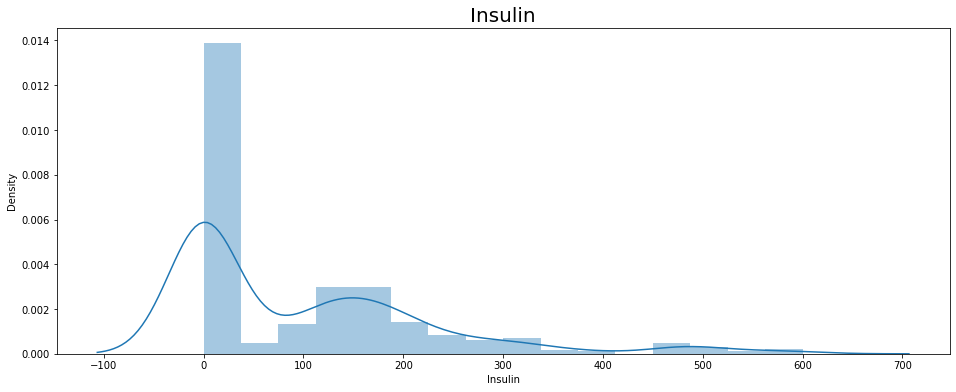

In [16]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

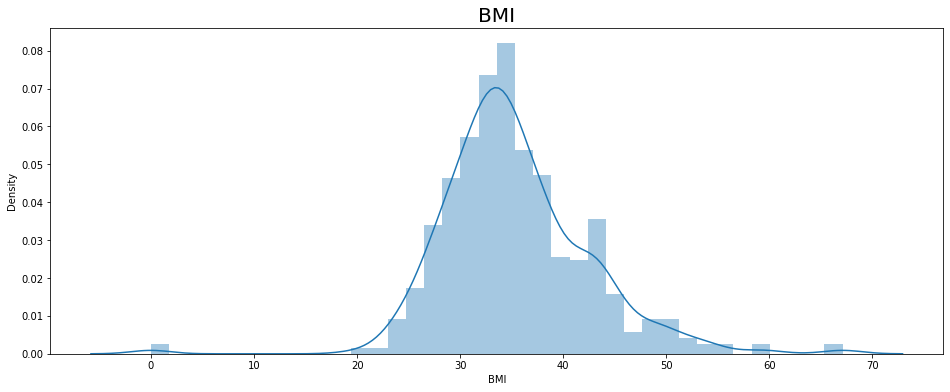

In [17]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'diabetespedigreefunction')

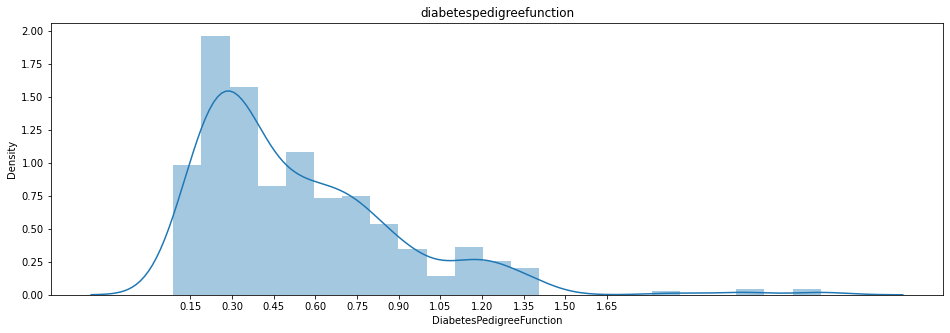

In [18]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (16,5))
sns.distplot(dataset["DiabetesPedigreeFunction"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

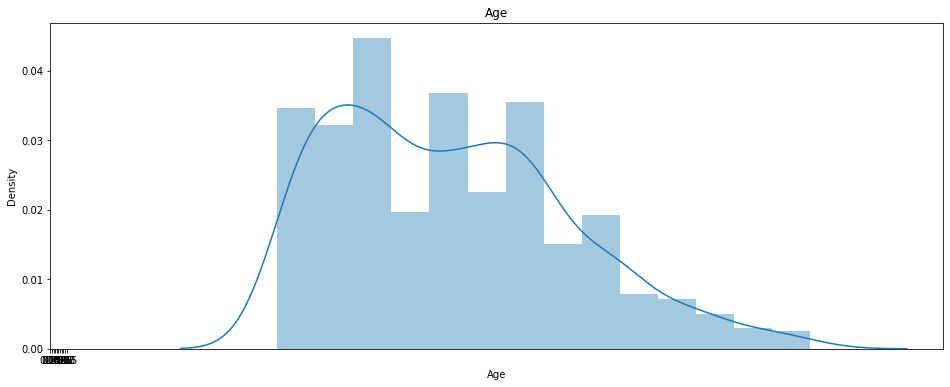

In [19]:
#Age for diabetic
fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Age"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

In [12]:
#Removing unnessary columns
x = dataset.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y = dataset.iloc[:,-1]

In [13]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#test_size 0.2 means for testing data 20% and training data 80%


In [14]:
x_train.shape #80% of original dataset (769,9) after removing unnecceasry data

(1600, 5)

In [15]:
x_test.shape #20% of original dataset (769,9) after removing unnecceasry data

(400, 5)

In [16]:
#Feature Scaling - To standardize the independent features present in the data in a fixed range.
#If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller
#values as the lower values, regardless of the unit of the values. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [17]:
x_train

array([[-0.01485297, -0.71569898, -0.70153446, -0.65077302,  2.50732972],
       [ 1.29329836,  0.29494207,  1.04410009,  1.04381097,  1.21199837],
       [-0.60663571, -0.71569898,  0.87438562, -0.5475188 ,  0.78022125],
       ...,
       [-0.82466093, -0.71569898, -0.03479904, -0.94838813, -0.16968841],
       [-1.13612553, -0.71569898, -0.26512582, -0.52626057,  0.17573329],
       [ 0.45234393, -0.71569898, -3.91398693,  0.50628164,  3.11181769]])

# **KNN - K Nearest Neighbor**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
#n_neighbors is 25 bcoz for x_train we got 614 which is near to 25^2
#metric means on what factor choosing so as its KNN so our metric is minkowski i.e., distance
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [19]:
#Predicting the data
knn_y_pred = knn.predict(x_test)

In [20]:
knn_y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

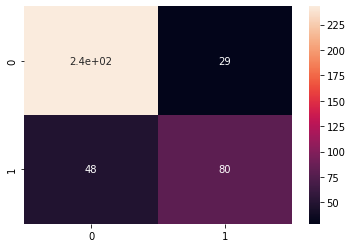

In [21]:
# Confusion matrix - To check how many are correct or wrong 
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [30]:
# The above heatmap says 0,0 means true negative and 1,1 means true positive 
# and 0,1 means even person is negative but showing result positive
# and 1,0 means person is positive but shows negative so its danger so we need to accurate our model

In [22]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))
print("Accuracy:",sum(knn_y_pred ==y_test)/len(knn_y_pred))

Correct: 323
Incorrect :  77
Accuracy: 0.8075


In [24]:
#Verfying accuracy using inbuilt methods
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,knn_y_pred)*100)

Accuracy:  80.75


# **Support Vector Machine (SVM)**

In [25]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [26]:
svc_y_pred = svc.predict(x_test)

In [27]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)

[[238  34]
 [ 57  71]]


In [29]:
print("Correct:",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy:",sum(svc_y_pred ==y_test)/len(knn_y_pred)*100)

Correct: 309
Incorrect :  91
Accuracy: 77.25


# **Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

In [107]:
rfc_train = rfc.predict(x_test)
from sklearn import metrics

print("Correct:",sum(rfc_train == y_test))
print("Incorrect : ",sum(rfc_train != y_test))
print("Accuracy:",sum(rfc_train ==y_test)/len(rfc_train)*100)



Correct: 399
Incorrect :  1
Accuracy: 99.75


In [87]:
#Accuracy
from sklearn import metrics

predictions = rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)*100))

Accuracy_Score = 99.75


# **Naive Bayes**

In [33]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [34]:
nb_y_pred =nb_classifier.predict(x_test)

In [35]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)

[[242  63]
 [ 30  65]]


In [36]:
print("Correct:",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy:",sum(nb_y_pred ==y_test)/len(nb_y_pred)*100)

Correct: 307
Incorrect :  93
Accuracy: 76.75


# **Decision Tree**
Building the model using DecisionTree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
d_train = dtree.predict(x_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_train)))

Accuracy_Score = 1.0


In [39]:
from sklearn import metrics

predictions = dtree.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score = 98.75


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[267   5]
 [  0 128]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       272
           1       0.96      1.00      0.98       128

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# **Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression(random_state=0)
diabetesCheck.fit(x_train, y_train)
d_log = diabetesCheck.predict(x_train)

In [45]:
from sklearn import metrics
predictions = diabetesCheck.predict(x_test)
# print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_train)))
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score = 77.25


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[239  33]
 [ 58  70]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       272
           1       0.68      0.55      0.61       128

    accuracy                           0.77       400
   macro avg       0.74      0.71      0.72       400
weighted avg       0.76      0.77      0.77       400



[ 1.00495365 -0.11097898  0.57466067  0.29223389  0.38063276]


Text(0.5, 0, 'Importance')

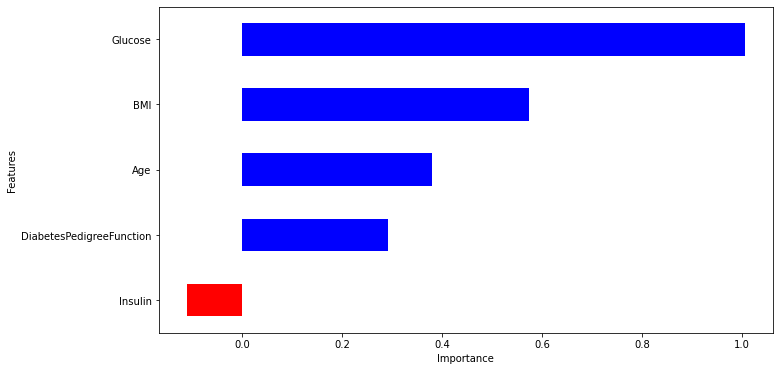

In [65]:
feature_names = ["Glucose","Insulin",	"BMI","DiabetesPedigreeFunction","Age"]
#Important feature for logistic regression prediction

coeff = diabetesCheck.coef_[0]
print(coeff)

labels = pd.DataFrame(feature_names, columns = ["feature"])
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

<AxesSubplot:>

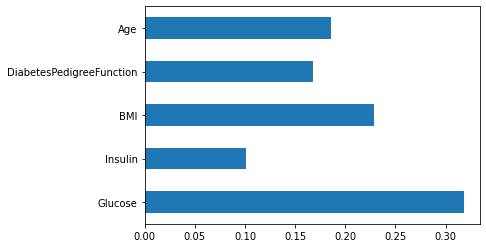

In [88]:
#Important feature for RFC prediction

(pd.Series(rfc.feature_importances_, index=x.columns).plot(kind='barh'))

### Saving the classifier

In [108]:
import pickle
pickle.dump(rfc, open('classifier.pkl', 'wb'))

In [109]:
pickle.dump(sc, open('sc.pkl', 'wb'))

In [69]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [120]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0
